<a href="https://colab.research.google.com/github/sidsanc/257_MachineLearning/blob/main/Assignment_2/Fractal_Clustering/CMPE_257_Fractal_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction 

**Objective** - Assessing the possible return on investment (ROI) of a real estate investment: Investors can use home price forecasts to assess the possible ROI of a property and decide whether to buy or sell in accordance with the results.


***The following was implemented by Siddhant Sancheti(016710421).***

### Loading the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url = 'https://drive.google.com/file/d/1qA2fTUqptEp1Tl7-BJ65CPxb_pAEreB5/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,201160.880491,...,813769.466391,822431.376391,827584.636712,830036.864170,828594.826334,825129.195530,821447.712758,819001.945987,815813.142567,808678.647857
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,132825.754108,...,280514.453444,282556.258884,283399.419980,282758.634204,281428.057013,279335.719049,277575.708756,276789.412421,276040.906854,276658.122961
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,104596.806928,...,265177.057834,269412.445906,273130.570365,275762.243180,276948.900393,276978.432118,276585.996347,276120.477385,274992.553186,273317.012108
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,141536.726396,...,451324.374826,460208.622243,467689.426727,471562.656551,471109.950209,466791.409465,461144.420585,455003.906651,448469.645177,443192.871681
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,207968.566822,...,847898.586557,864259.328619,873352.448962,873825.528780,866733.566062,855018.047342,844378.996804,836239.400659,829201.659955,822400.646686


### Preprocessing

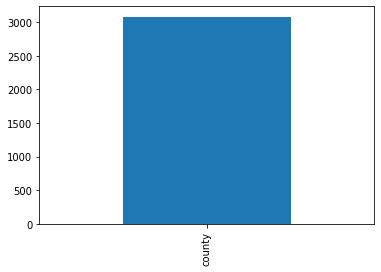

In [ ]:
pd.options.plotting.backend = 'matplotlib'
df['RegionType'].value_counts().plot.bar()

In [ ]:
df['RegionName'].value_counts()

Washington County    30
Jefferson County     25
Franklin County      24
Lincoln County       23
Jackson County       23
                     ..
Winona County         1
Saint Mary Parish     1
Ogle County           1
Culpeper County       1
Arthur County         1
Name: RegionName, Length: 1840, dtype: int64

**Creating a dataframe with Month on Month Increase Percentage**

In [ ]:
change_df = df.iloc[:, 9:]
change_df = change_df.pct_change(axis=1)

In [ ]:
change_df['Mean'] = change_df.mean(axis = 1).round(decimals = 3)
change_df.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,Mean
0,NaN,0.001071,0.004114,0.008088,0.010265,0.009753,0.009820,0.010056,0.009273,0.007380,...,0.010644,0.006266,0.002963,-0.001737,-0.004183,-0.004462,-0.002977,-0.003894,-0.008745,0.005
1,NaN,-0.000191,0.001657,0.004755,0.006106,0.006353,0.005831,0.008089,0.009300,0.011075,...,0.007279,0.002984,-0.002261,-0.004706,-0.007435,-0.006301,-0.002833,-0.002704,0.002236,0.003
2,NaN,-0.000271,-0.001479,-0.000621,-0.000244,0.001708,0.001928,0.002785,0.003620,0.003046,...,0.015972,0.013801,0.009635,0.004303,0.000107,-0.001417,-0.001683,-0.004085,-0.006093,0.003
3,NaN,0.002045,0.002694,0.005524,0.006054,0.005086,0.005036,0.004657,0.005236,0.004837,...,0.019685,0.016255,0.008282,-0.000960,-0.009167,-0.012097,-0.013316,-0.014361,-0.011766,0.004
4,NaN,0.003930,0.004758,0.010724,0.011464,0.014312,0.016437,0.017770,0.016425,0.013601,...,0.019296,0.010521,0.000542,-0.008116,-0.013517,-0.012443,-0.009640,-0.008416,-0.008202,0.005


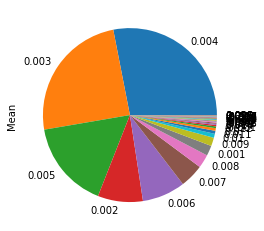

In [ ]:
change_df['Mean'].value_counts().plot.pie()

In [ ]:
train_df = df.iloc[:,9:]
train_df['Y'] = df['RegionName']
train_df = train_df.dropna()
train_df.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,Y
0,201160.880491,201376.294939,202204.760878,203840.218061,205932.549781,207941.104745,209983.041983,212094.583933,214061.310244,215641.163325,...,822431.376391,8.275846e+05,8.300369e+05,8.285948e+05,825129.195530,821447.712758,819001.945987,815813.142567,808678.647857,Los Angeles County
1,132825.754108,132800.343980,133020.447052,133653.020987,134469.131120,135323.411224,136112.538960,137213.559502,138489.650689,140023.455159,...,282556.258884,2.833994e+05,2.827586e+05,2.814281e+05,279335.719049,277575.708756,276789.412421,276040.906854,276658.122961,Cook County
2,104596.806928,104568.422018,104413.769758,104348.877864,104323.438664,104501.606653,104703.128333,104994.747034,105374.879723,105695.812200,...,269412.445906,2.731306e+05,2.757622e+05,2.769489e+05,276978.432118,276585.996347,276120.477385,274992.553186,273317.012108,Harris County
4,207968.566822,208785.884184,209779.381219,212029.096109,214459.817224,217529.135884,221104.735244,225033.796022,228729.881085,231840.754632,...,864259.328619,8.733524e+05,8.738255e+05,8.667336e+05,855018.047342,844378.996804,836239.400659,829201.659955,822400.646686,San Diego County
5,245218.565050,247375.831940,248907.523248,252042.132435,254749.820041,257616.876737,260564.955656,263461.624178,266329.317777,269388.719094,...,996085.381923,1.005477e+06,1.005832e+06,1.000694e+06,993181.031151,988627.402185,985263.822026,980739.167763,971399.859295,Orange County


In [ ]:
from sklearn.model_selection import train_test_split
train_df_y = train_df['Y']
train_df = train_df.drop('Y', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(train_df,train_df_y, test_size=0.33, random_state=4)


### Applying Fractal Clustering

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

**UTILITIES**

In [ ]:
def plot_cluster(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


In [ ]:
def apply_cluster(df, clusters=2):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster))
    
    return df

In [ ]:
change_df_train = change_df.iloc[:,1:].dropna().drop('Mean',axis=1)

For every iteration we will do the following - 

*   Performing K-Means for 2 to 24 clusters and ploting the SSE and Silhouette Score.
*   Applying K-Means with the optimal number of clusters.
*   Checking the Skewdness of the clusters.
*   Adding Colors and RegionName to our dataframe.
*   Ploting the clusters on a scatter plot.



#### First Iteration

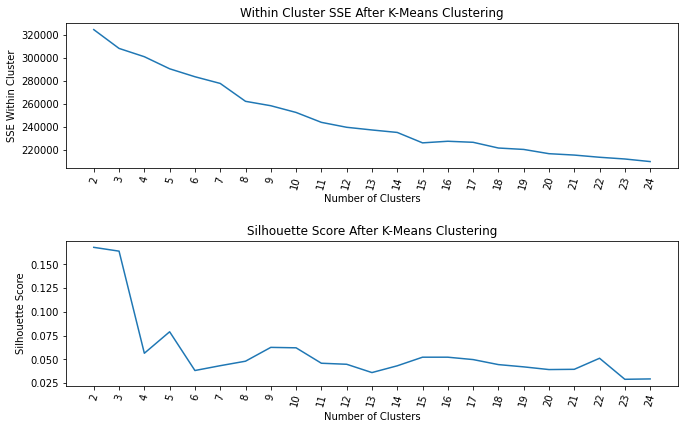

In [ ]:

plot_cluster(change_df_train, max_loop=25)

**Optimal Cluster** is 3.

In [ ]:
first_trial = apply_cluster(change_df_train, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.16
sse withing cluster: 307957.3514072577


In [ ]:
cluster_perf_df = first_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          786
1        1          249
2        2            1
Name: cluster, dtype: int64

In [ ]:
colors = ['#DF2020', '#81DF20', '#2095DF']
first_trial['c'] = first_trial.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
first_trial['Y'] = df['RegionName']
first_trial.head()

,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,cluster,c,Y
0,0.001071,0.004114,0.008088,0.010265,0.009753,0.009820,0.010056,0.009273,0.007380,0.006706,...,0.002963,-0.001737,-0.004183,-0.004462,-0.002977,-0.003894,-0.008745,1,#81DF20,Los Angeles County
1,-0.000191,0.001657,0.004755,0.006106,0.006353,0.005831,0.008089,0.009300,0.011075,0.012412,...,-0.002261,-0.004706,-0.007435,-0.006301,-0.002833,-0.002704,0.002236,1,#81DF20,Cook County
2,-0.000271,-0.001479,-0.000621,-0.000244,0.001708,0.001928,0.002785,0.003620,0.003046,0.004928,...,0.009635,0.004303,0.000107,-0.001417,-0.001683,-0.004085,-0.006093,0,#DF2020,Harris County
3,0.002045,0.002694,0.005524,0.006054,0.005086,0.005036,0.004657,0.005236,0.004837,0.004863,...,0.008282,-0.000960,-0.009167,-0.012097,-0.013316,-0.014361,-0.011766,1,#81DF20,Maricopa County
4,0.003930,0.004758,0.010724,0.011464,0.014312,0.016437,0.017770,0.016425,0.013601,0.013024,...,0.000542,-0.008116,-0.013517,-0.012443,-0.009640,-0.008416,-0.008202,1,#81DF20,San Diego County


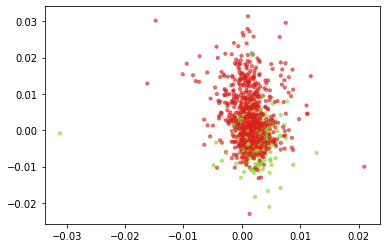

In [ ]:
plt.scatter(first_trial['2000-02-29'], first_trial['2023-01-31'],c=first_trial.c, alpha = 0.6, s=10)

We see that after the first iterration there are 2 prominent clusters and hence we need to perform a second iteration on the more prominent one.



#### Second Iteration

In [ ]:
df3 = first_trial.query("cluster == 0").reset_index(drop=True).drop(['c', 'Y'], axis=1)

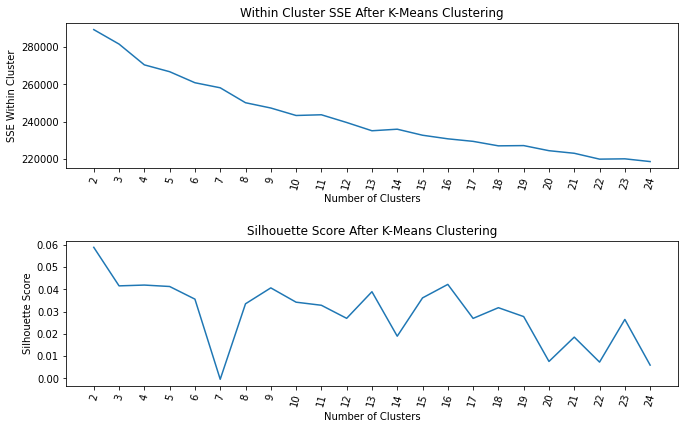

In [ ]:
plot_cluster(df3, max_loop=25)

**Optimal Cluster** is 2.

In [ ]:
second_trial= apply_cluster(df3, clusters=2)

clustering performance
-----------------------------------
silhouette score: 0.06
sse withing cluster: 289427.03580761305


In [ ]:
cluster_perf_df = second_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          151
1        1          635
Name: cluster, dtype: int64

In [ ]:
colors = ['#e6194b', '#3cb44b']
second_trial['c'] = second_trial.cluster.map({0:colors[0], 1:colors[1]})
second_trial['Y'] = df['RegionName']
second_trial.head()

,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,cluster,c,Y
0,-0.000271,-0.001479,-0.000621,-0.000244,0.001708,0.001928,0.002785,0.003620,0.003046,0.004928,...,0.009635,0.004303,0.000107,-0.001417,-0.001683,-0.004085,-0.006093,1,#3cb44b,Los Angeles County
1,0.000629,0.000857,0.001930,0.002420,0.002418,0.002784,0.003668,0.004729,0.005020,0.005001,...,0.007059,0.001332,-0.002531,-0.002649,-0.003011,-0.005268,-0.006705,1,#3cb44b,Cook County
2,0.000708,0.000264,0.001055,0.001242,0.001630,0.001342,0.002244,0.002082,0.002563,0.002291,...,0.008278,0.002037,-0.002480,-0.003629,-0.004406,-0.007544,-0.009169,1,#3cb44b,Harris County
3,0.000961,0.000741,0.001389,-0.004536,-0.006389,-0.007153,-0.001487,0.000013,0.000384,-0.000048,...,0.008533,0.002742,-0.001904,-0.002695,-0.002530,-0.004425,-0.004419,1,#3cb44b,Maricopa County
4,0.002066,0.001995,0.004427,0.006715,0.006562,0.006855,0.004585,0.005164,0.005243,0.005520,...,0.003473,-0.003443,-0.005950,-0.003763,-0.001855,-0.003500,0.000178,0,#e6194b,San Diego County


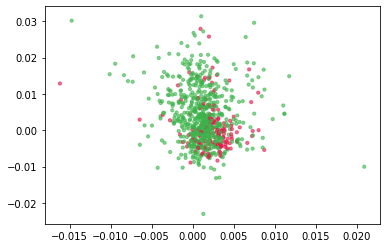

In [ ]:
plt.scatter(second_trial['2000-02-29'], second_trial['2023-01-31'],c=second_trial.c, alpha = 0.6, s=10)

After the second iteration we again found two prominent clusters, thus we will dive deeper and perform a third iteration on the more prominent cluster.

#### Third Iteration

In [ ]:
df4 = second_trial.query("cluster == 1").reset_index(drop=True).drop(['c', 'Y'], axis=1)

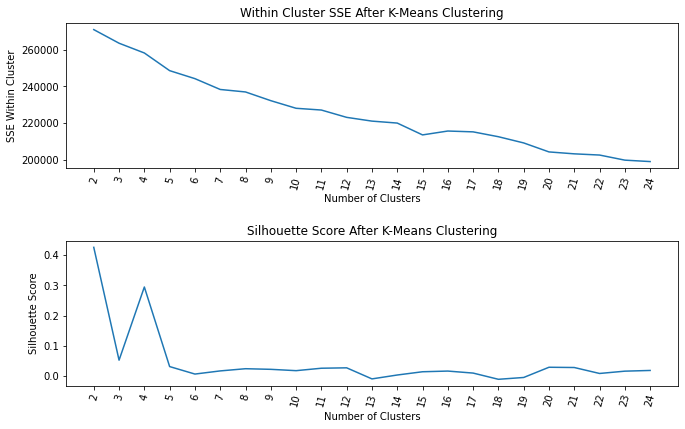

In [ ]:
plot_cluster(df4, max_loop=25)

**Optimal Cluster** is 2.

In [ ]:
third_trial = apply_cluster(df4, clusters=2)

clustering performance
-----------------------------------
silhouette score: 0.43
sse withing cluster: 270974.5772739487


In [ ]:
cluster_perf_df = third_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0            6
1        1          629
Name: cluster, dtype: int64

In [ ]:
colors = ['#e6194b', '#3cb44b']
third_trial['c'] = third_trial.cluster.map({0:colors[0], 1:colors[1]})
third_trial['Y'] = df['RegionName']
third_trial.head()

,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,cluster,c,Y
0,-0.000271,-0.001479,-0.000621,-0.000244,0.001708,0.001928,0.002785,0.003620,0.003046,0.004928,...,0.009635,0.004303,0.000107,-0.001417,-0.001683,-0.004085,-6.093042e-03,1,#3cb44b,Los Angeles County
1,0.000629,0.000857,0.001930,0.002420,0.002418,0.002784,0.003668,0.004729,0.005020,0.005001,...,0.007059,0.001332,-0.002531,-0.002649,-0.003011,-0.005268,-6.705173e-03,1,#3cb44b,Cook County
2,0.000708,0.000264,0.001055,0.001242,0.001630,0.001342,0.002244,0.002082,0.002563,0.002291,...,0.008278,0.002037,-0.002480,-0.003629,-0.004406,-0.007544,-9.168719e-03,1,#3cb44b,Harris County
3,0.000961,0.000741,0.001389,-0.004536,-0.006389,-0.007153,-0.001487,0.000013,0.000384,-0.000048,...,0.008533,0.002742,-0.001904,-0.002695,-0.002530,-0.004425,-4.418648e-03,1,#3cb44b,Maricopa County
4,0.000756,0.001487,0.003229,0.003877,0.003910,0.004191,0.005055,0.005130,0.004762,0.004200,...,0.008294,0.002400,-0.001981,-0.002563,-0.002289,-0.002625,-7.166316e-08,1,#3cb44b,San Diego County


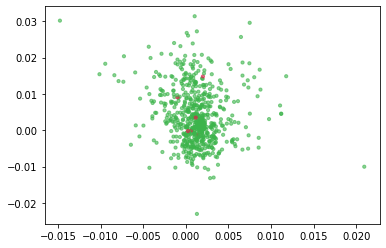

In [ ]:
plt.scatter(third_trial['2000-02-29'], third_trial['2023-01-31'],c=third_trial.c, alpha = 0.6, s=10)

In [ ]:
cluster_perf_df['Y'].value_counts()

cluster  Y                 
0        Garland County        1
         Rensselaer County     1
         Roanoke County        1
         Tippecanoe County     1
         Volusia County        1
                              ..
1        Yamhill County        1
         Yavapai County        1
         Yellowstone County    1
         Yolo County           1
         Yuma County           1
Name: Y, Length: 527, dtype: int64

On performing the third iteration we got one prominent cluster which will become our golden cluster.

### Finding Most Suitable Algorithm

**UTILITIES**

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

Function to Calculate **Fractal Distance** between two points

In [ ]:
def fractal_distance(p1, p2): 
  x1, y1, x2, y2 = p1[0],p1[1], p2[0], p2[1]
  num_divisions = 3
  # Create a grid with num_divisions x num_divisions boxes
  x = np.linspace(min(x1, x2), max(x1, x2), num_divisions + 1) 
  y = np.linspace(min(y1, y2), max(y1, y2), num_divisions + 1) 
  grid = np.zeros((num_divisions, num_divisions))
  
  # Place a point at each of the two endpoints
  x1_idx = np.argmin(np.abs(x - x1)) - 1
  y1_idx = np.argmin(np.abs(y - y1)) - 1
  grid[y1_idx, x1_idx] = 1
  x2_idx = np.argmin(np.abs(x - x2)) - 1
  y2_idx = np.argmin(np.abs(y - y2)) - 1
  grid[y2_idx, x2_idx] = 1

  # Count the number of boxes that contain at least one point 
  num_boxes_with_points = 0
  for i in range(num_divisions):
    for j in range(num_divisions):
      if np.sum(grid[i:i+2, j:j+2]) > 0:
        num_boxes_with_points += 1
  
  # Calculate the fractal dimension and use it to estimate the length of the path
  fractal_dim = np.log(num_boxes_with_points) / np.log(2)
  fractal_length = (2 ** fractal_dim) * ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
  return fractal_length

In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Function to Plot and Compare **K-Means** with Fractal distance

In [ ]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
from pyclustering.cluster.silhouette import silhouette

def plot_cluster_kmeans(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:].values    
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    silhouette_score = {}
    metric  = distance_metric(type_metric.USER_DEFINED, func=fractal_distance)
    
    for k in range(2, max_loop):
        initial_centers = random_center_initializer(X, k, random_state=5).initialize()
        instance = kmeans(X_rb, initial_centers=initial_centers, metric=metric)
        instance.process()
        silhouette_score_i = silhouette(X_rb, instance.get_clusters()).process().get_score()
        silhouette_score[k] = sum(silhouette_score_i) / len(silhouette_score_i)

    _ = plt.figure(figsize=(10,6))

    ax1 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


Function to Plot and Compare **DBSCAN** with Fractal distance

In [ ]:
 from sklearn.cluster import DBSCAN
def plot_cluster_dbscan(df):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:].values    
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)


    silhouette_score = -1
    
    
    cluster_labels = DBSCAN(eps=3, min_samples=2, metric=fractal_distance).fit_predict(X_rb)
    silhouette_score = metrics.silhouette_score(X_rb, cluster_labels, random_state=10)

    print("Silhouette Score is ", silhouette_score)

Function to Plot and Compare **Spectral Clustering** with Fractal distance

In [ ]:
from sklearn.cluster import SpectralClustering
def plot_cluster_spectral(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:].values    
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    silhouette_score = {}

    for k in range(2, max_loop):
        cluster_labels = SpectralClustering(n_clusters=k, assign_labels='discretize', random_state=10, affinity=fractal_distance).fit_predict(X_rb)
        silhouette_score[k] = metrics.silhouette_score(X_rb, cluster_labels, random_state=10)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After Spectral Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


Function to Plot and Compare **Agglomerative Clustering** with Fractal distance

In [ ]:
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
def plot_cluster_agglomerative(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:].values    
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    def sim_affinity(X):
      return metrics.pairwise_distances(X, metric=fractal_distance)

    silhouette_score = {}
    
    for k in range(2, max_loop):
        instance = AgglomerativeClustering(n_clusters=k, affinity=sim_affinity, linkage='average')
        instance.fit_predict(X_rb)
        cluster_labels = instance.labels_
        silhouette_score[k] = metrics.silhouette_score(X_rb, cluster_labels, random_state=10)

    _ = plt.figure(figsize=(10,6))
    
    ax1 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After Agglomerative Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


In [ ]:
change_df_train = change_df.iloc[:,1:].dropna().drop('Mean',axis=1)

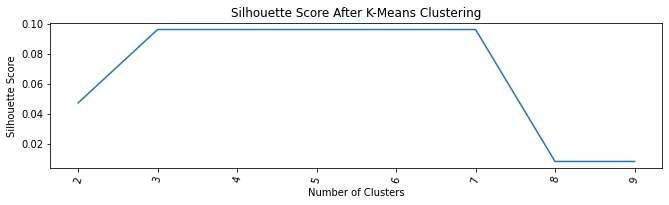

In [ ]:
plot_cluster_kmeans(change_df_train, 10)

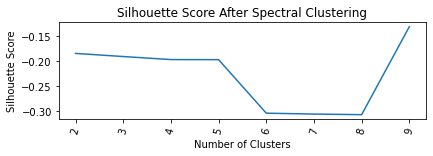

In [ ]:
plot_cluster_spectral(change_df_train, 10)

In [ ]:
plot_cluster_dbscan(change_df_train)

Silhouette Score is  0.0028006651828327896


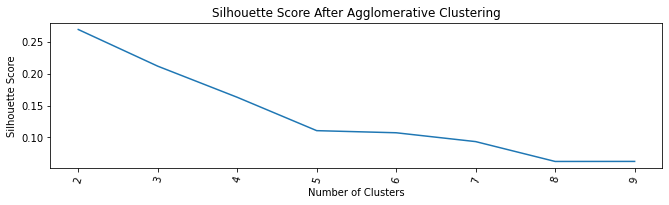

In [ ]:
plot_cluster_agglomerative(change_df_train, 10)

Comparing the Silhouette score of different algorithms, the best suited algorithm is **Agglomerative Clustering**

### Applying Fractal Clustering with - Agglomerative Clustering

In [ ]:
def apply_cluster(df, clusters=2):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    def sim_affinity(X):
      return metrics.pairwise_distances(X, metric=fractal_distance)

    instance = AgglomerativeClustering(n_clusters=clusters, affinity=sim_affinity, linkage='average')
    instance.fit_predict(X_rb)
    score = metrics.silhouette_score(X_rb, instance.labels_, random_state=10)
    df['cluster'] = instance.labels_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    
    return df

#### First Iteration

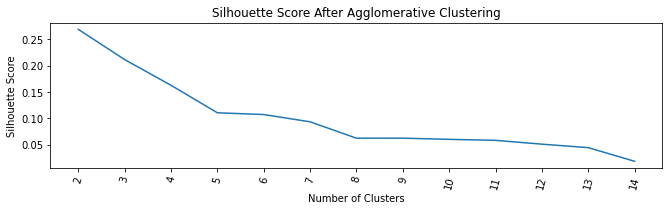

In [ ]:
plot_cluster_agglomerative(change_df_train, 15)

**Optimal Cluster** is 2.

In [ ]:
first_trial = apply_cluster(change_df_train, clusters=2)

clustering performance
-----------------------------------
silhouette score: 0.27


In [ ]:
cluster_perf_df = first_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          1035
1        1             1
Name: cluster, dtype: int64

In [ ]:
colors = ['#DF2020', '#81DF20']
first_trial['c'] = first_trial.cluster.map({0:colors[0], 1:colors[1]})
first_trial['Y'] = df['RegionName']
first_trial.head()

,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,cluster,c,Y
0,0.001071,0.004114,0.008088,0.010265,0.009753,0.009820,0.010056,0.009273,0.007380,0.006706,...,0.002963,-0.001737,-0.004183,-0.004462,-0.002977,-0.003894,-0.008745,0,#DF2020,Los Angeles County
1,-0.000191,0.001657,0.004755,0.006106,0.006353,0.005831,0.008089,0.009300,0.011075,0.012412,...,-0.002261,-0.004706,-0.007435,-0.006301,-0.002833,-0.002704,0.002236,0,#DF2020,Cook County
2,-0.000271,-0.001479,-0.000621,-0.000244,0.001708,0.001928,0.002785,0.003620,0.003046,0.004928,...,0.009635,0.004303,0.000107,-0.001417,-0.001683,-0.004085,-0.006093,0,#DF2020,Harris County
3,0.002045,0.002694,0.005524,0.006054,0.005086,0.005036,0.004657,0.005236,0.004837,0.004863,...,0.008282,-0.000960,-0.009167,-0.012097,-0.013316,-0.014361,-0.011766,0,#DF2020,Maricopa County
4,0.003930,0.004758,0.010724,0.011464,0.014312,0.016437,0.017770,0.016425,0.013601,0.013024,...,0.000542,-0.008116,-0.013517,-0.012443,-0.009640,-0.008416,-0.008202,0,#DF2020,San Diego County


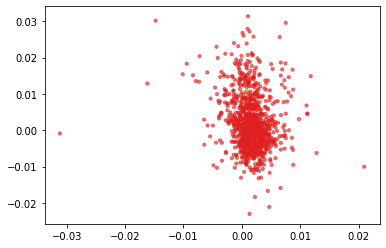

In [ ]:
plt.scatter(first_trial['2000-02-29'], first_trial['2023-01-31'],c=first_trial.c, alpha = 0.6, s=10)

We see that after the first iterration there is only one Prominent Cluster. And so we will use it for the second iteration.



#### Second Iteration

In [ ]:
df3 = first_trial.query("cluster == 0").reset_index(drop=True).drop(['c', 'Y'], axis=1)

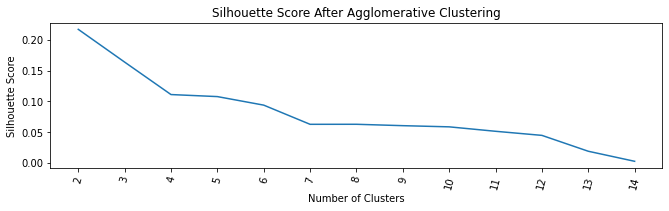

In [ ]:
plot_cluster_agglomerative(df3, max_loop=15)

**Optimal Cluster** is 2.

In [ ]:
second_trial= apply_cluster(df3, clusters=2)

clustering performance
-----------------------------------
silhouette score: 0.22


In [ ]:
cluster_perf_df = second_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          1033
1        1             2
Name: cluster, dtype: int64

In [ ]:
colors = ['#e6194b', '#3cb44b']
second_trial['c'] = second_trial.cluster.map({0:colors[0], 1:colors[1]})
second_trial['Y'] = df['RegionName']
second_trial.head()

,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,cluster,c,Y
0,0.001071,0.004114,0.008088,0.010265,0.009753,0.009820,0.010056,0.009273,0.007380,0.006706,...,0.002963,-0.001737,-0.004183,-0.004462,-0.002977,-0.003894,-0.008745,0,#e6194b,Los Angeles County
1,-0.000191,0.001657,0.004755,0.006106,0.006353,0.005831,0.008089,0.009300,0.011075,0.012412,...,-0.002261,-0.004706,-0.007435,-0.006301,-0.002833,-0.002704,0.002236,0,#e6194b,Cook County
2,-0.000271,-0.001479,-0.000621,-0.000244,0.001708,0.001928,0.002785,0.003620,0.003046,0.004928,...,0.009635,0.004303,0.000107,-0.001417,-0.001683,-0.004085,-0.006093,0,#e6194b,Harris County
3,0.002045,0.002694,0.005524,0.006054,0.005086,0.005036,0.004657,0.005236,0.004837,0.004863,...,0.008282,-0.000960,-0.009167,-0.012097,-0.013316,-0.014361,-0.011766,0,#e6194b,Maricopa County
4,0.003930,0.004758,0.010724,0.011464,0.014312,0.016437,0.017770,0.016425,0.013601,0.013024,...,0.000542,-0.008116,-0.013517,-0.012443,-0.009640,-0.008416,-0.008202,0,#e6194b,San Diego County


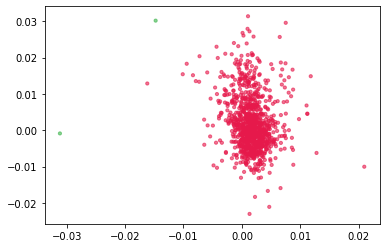

In [ ]:
plt.scatter(second_trial['2000-02-29'], second_trial['2023-01-31'],c=second_trial.c, alpha = 0.6, s=10)

After the second iteration we find only one prominenet Cluster. This confirms that we have found our golden Cluster.

In [ ]:
df_golden = second_trial.query("cluster == 0").reset_index(drop=True)
df_golden.head()

,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,cluster,c,Y
0,0.001071,0.004114,0.008088,0.010265,0.009753,0.009820,0.010056,0.009273,0.007380,0.006706,...,0.002963,-0.001737,-0.004183,-0.004462,-0.002977,-0.003894,-0.008745,0,#e6194b,Los Angeles County
1,-0.000191,0.001657,0.004755,0.006106,0.006353,0.005831,0.008089,0.009300,0.011075,0.012412,...,-0.002261,-0.004706,-0.007435,-0.006301,-0.002833,-0.002704,0.002236,0,#e6194b,Cook County
2,-0.000271,-0.001479,-0.000621,-0.000244,0.001708,0.001928,0.002785,0.003620,0.003046,0.004928,...,0.009635,0.004303,0.000107,-0.001417,-0.001683,-0.004085,-0.006093,0,#e6194b,Harris County
3,0.002045,0.002694,0.005524,0.006054,0.005086,0.005036,0.004657,0.005236,0.004837,0.004863,...,0.008282,-0.000960,-0.009167,-0.012097,-0.013316,-0.014361,-0.011766,0,#e6194b,Maricopa County
4,0.003930,0.004758,0.010724,0.011464,0.014312,0.016437,0.017770,0.016425,0.013601,0.013024,...,0.000542,-0.008116,-0.013517,-0.012443,-0.009640,-0.008416,-0.008202,0,#e6194b,San Diego County


### Future Scope
We have found our golden cluter and now we need to relate this cluster to the FHFA dataset so that we can compare the increase in prices to differnt House Price Indices.